# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

<ipython-input-1-ecc952a261ad>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


# Data Exploration

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [3]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df[['Systolic', 'Diastolic']] = df[['Systolic', 'Diastolic']].astype(int)

In [6]:
df.drop('Blood Pressure',axis=1,inplace=True)

In [7]:
df.drop(['Person ID','Heart Rate'],axis=1, inplace=True)

In [8]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,7000,Sleep Apnea,140,95


# Visualizations

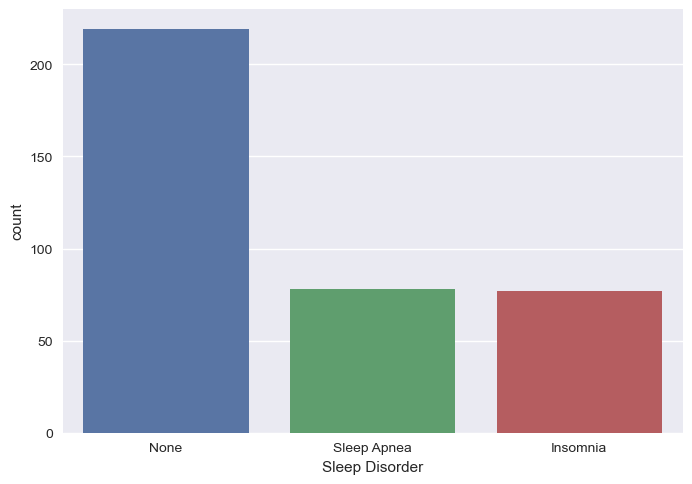

In [9]:
sns.countplot(data=df, x='Sleep Disorder')
plt.show()

In [10]:
df["Sleep Disorder"].value_counts(normalize=True)

None           0.585561
Sleep Apnea    0.208556
Insomnia       0.205882
Name: Sleep Disorder, dtype: float64

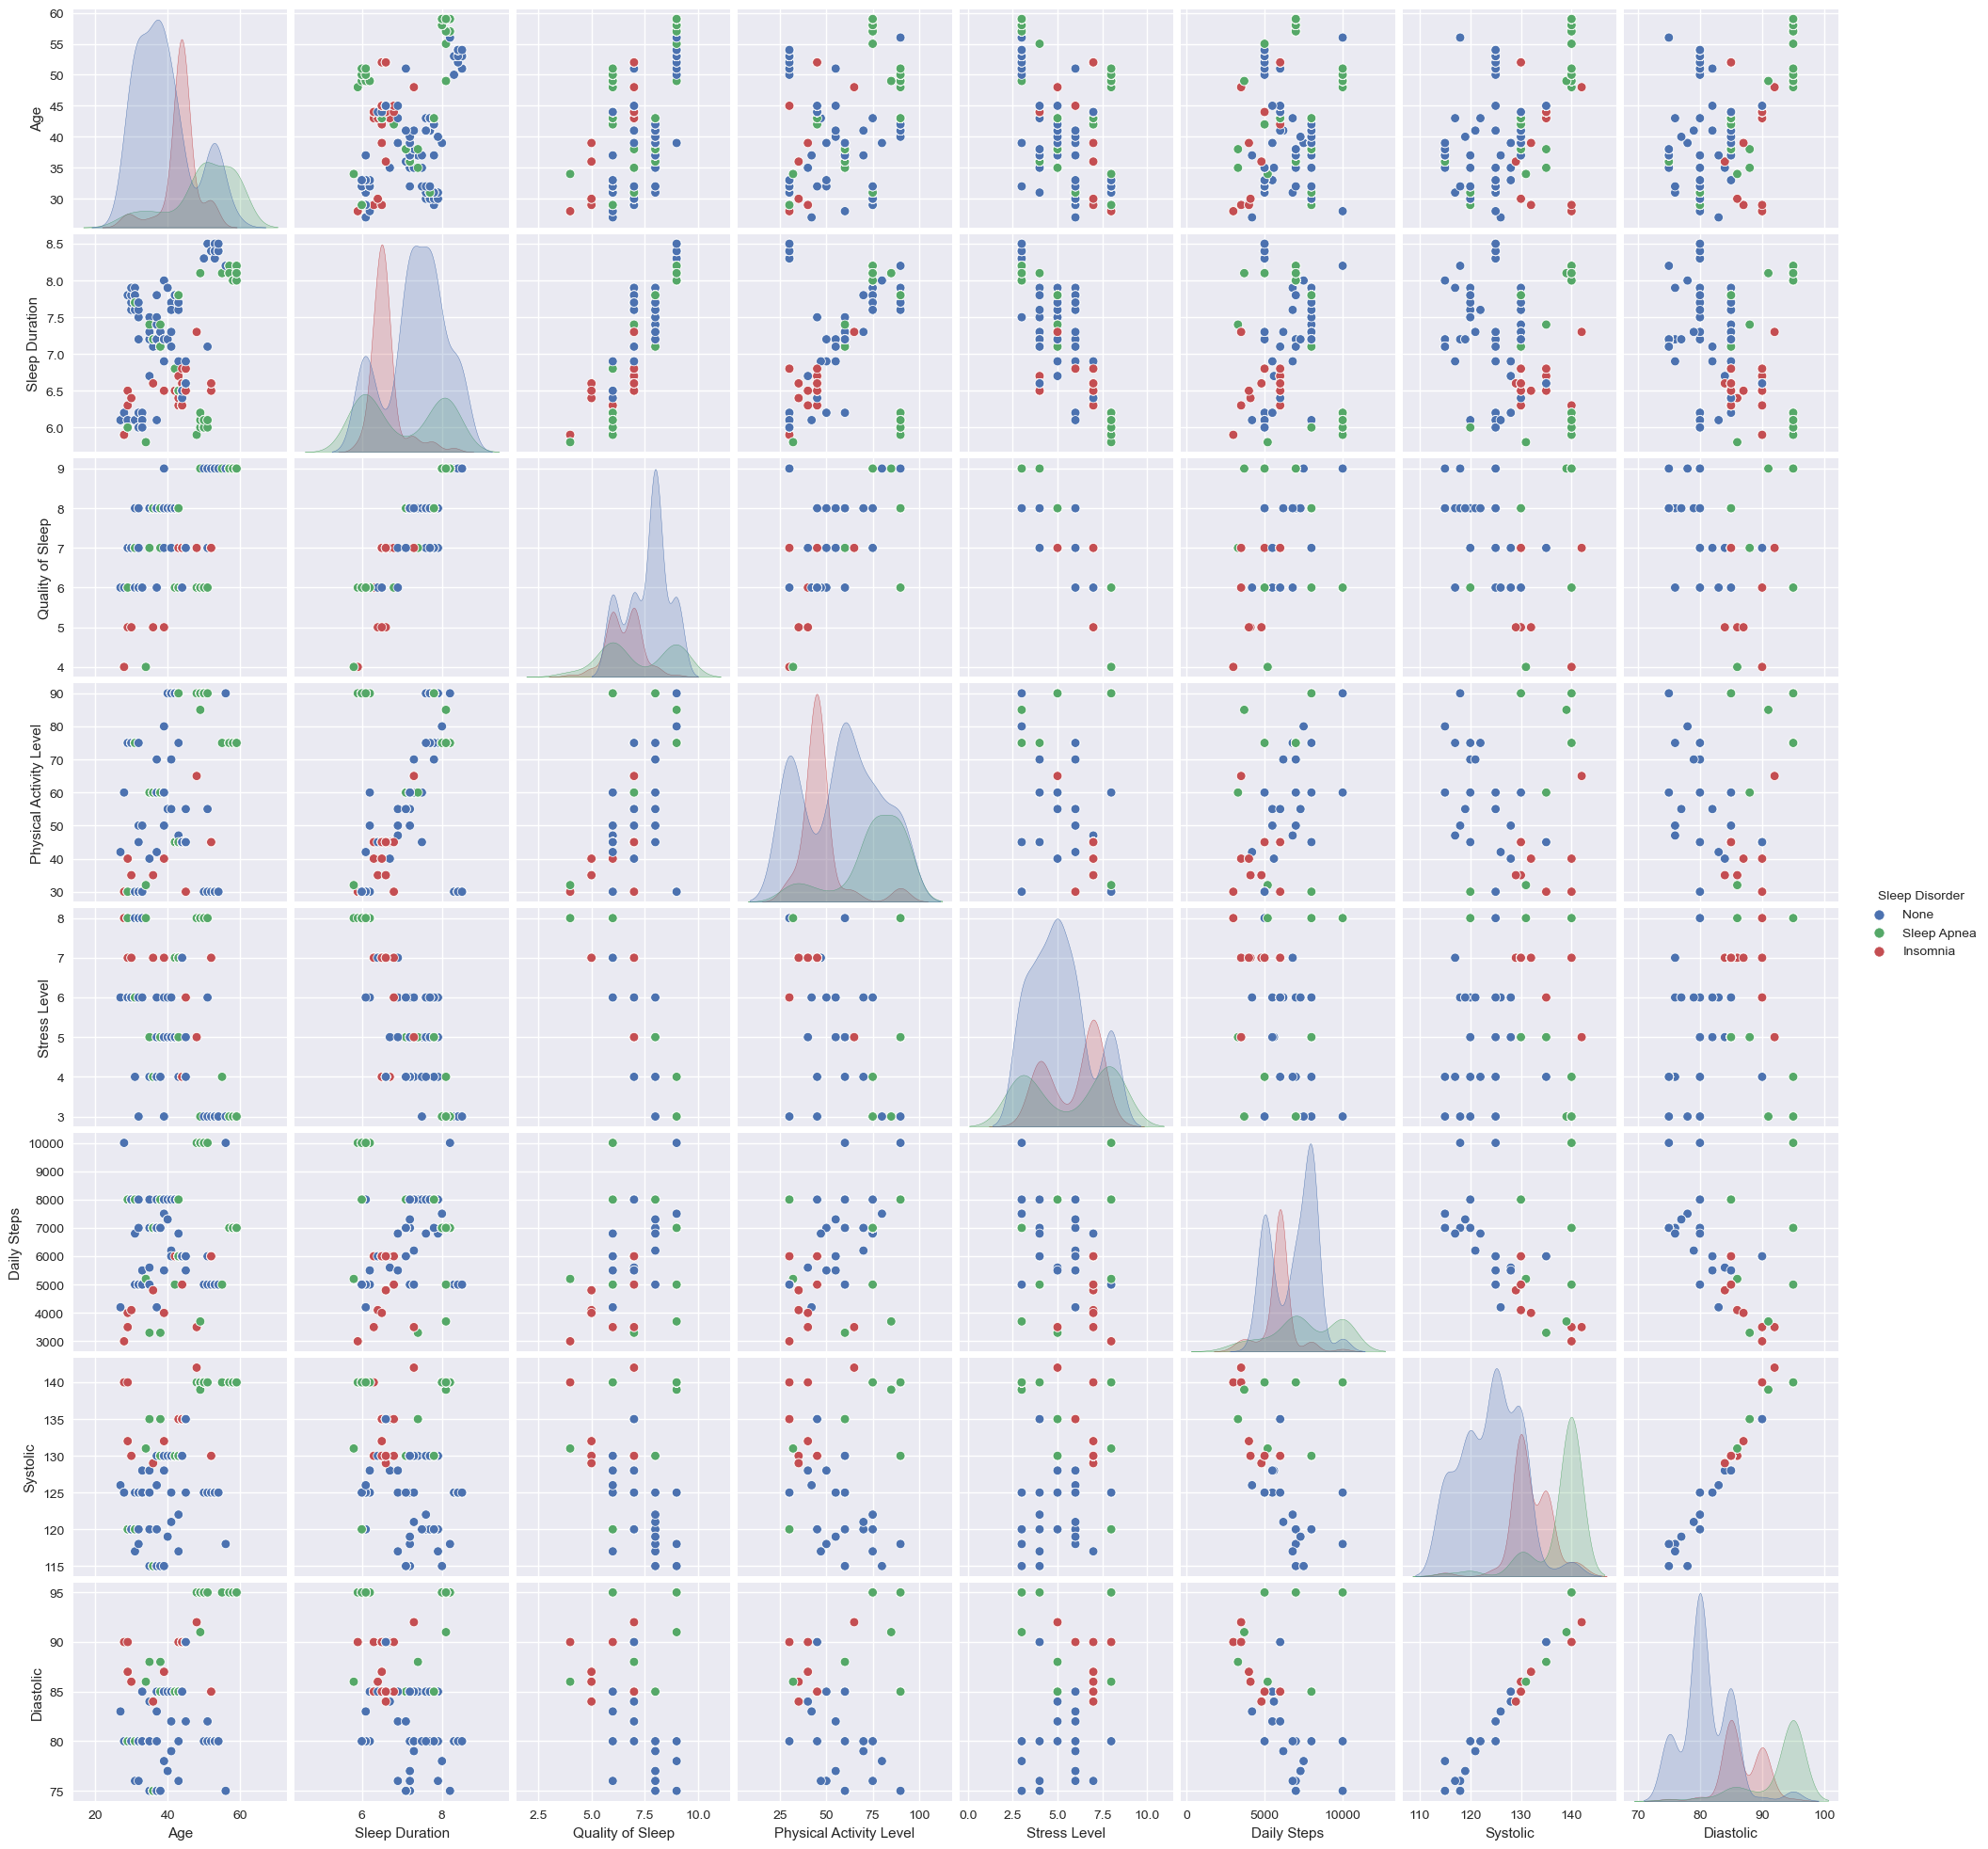

In [11]:
sns.pairplot(df,hue='Sleep Disorder')
plt.show()

<ipython-input-12-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


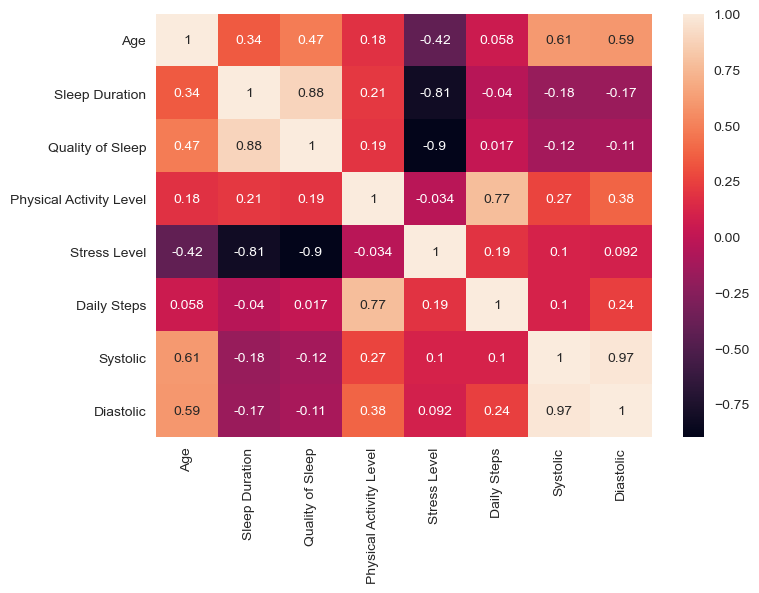

In [12]:
sns.heatmap(df.corr(), annot=True)
plt.show()

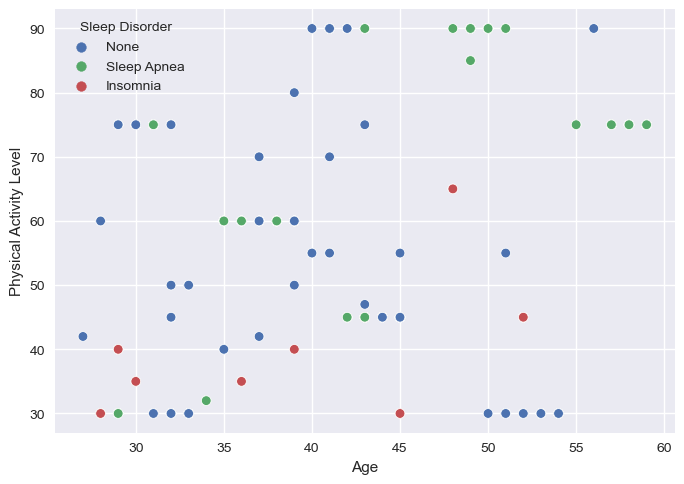

In [13]:
sns.scatterplot(x='Age', y='Physical Activity Level', data=df, hue='Sleep Disorder')
plt.show()

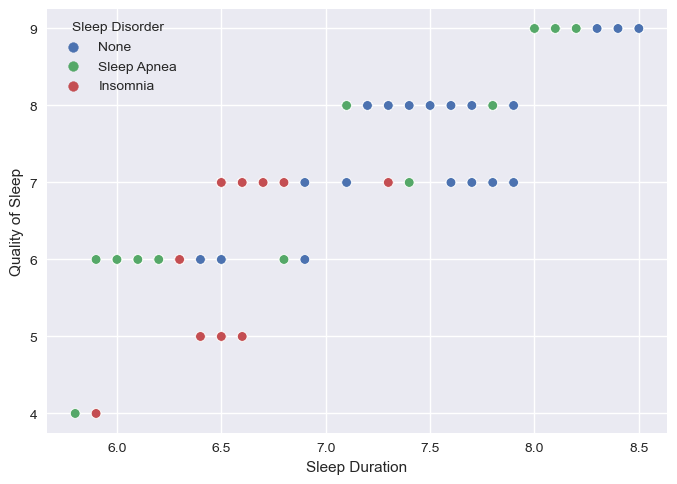

In [14]:
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=df, hue='Sleep Disorder')
plt.show()

# Feature Engineering

In [15]:
X = pd.get_dummies(df.drop(['Sleep Disorder'], axis=1), drop_first=True)
y = df['Sleep Disorder']

In [16]:
X

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Daily Steps,Systolic,Diastolic,Gender_Male,Occupation_Doctor,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,27,6.1,6,42,6,4200,126,83,1,0,...,0,0,0,0,0,1,0,0,0,1
1,28,6.2,6,60,8,10000,125,80,1,1,...,0,0,0,0,0,0,0,0,0,0
2,28,6.2,6,60,8,10000,125,80,1,1,...,0,0,0,0,0,0,0,0,0,0
3,28,5.9,4,30,8,3000,140,90,1,0,...,0,0,1,0,0,0,0,0,1,0
4,28,5.9,4,30,8,3000,140,90,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,7000,140,95,0,0,...,0,1,0,0,0,0,0,0,0,1
370,59,8.0,9,75,3,7000,140,95,0,0,...,0,1,0,0,0,0,0,0,0,1
371,59,8.1,9,75,3,7000,140,95,0,0,...,0,1,0,0,0,0,0,0,0,1
372,59,8.1,9,75,3,7000,140,95,0,0,...,0,1,0,0,0,0,0,0,0,1


In [17]:
X.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Daily Steps', 'Systolic', 'Diastolic', 'Gender_Male',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal Weight',
       'BMI Category_Obese', 'BMI Category_Overweight'],
      dtype='object')

# Setting up results tabulation

In [18]:
model_results = pd.DataFrame()

# Scaling, Train | Test Split

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 22), (94, 22), (280,), (94,))

In [22]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Multi-Class Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [24]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [25]:
log_model = LogisticRegression(solver='saga',multi_class="auto",max_iter=5000)

In [26]:
C = np.logspace(0, 3, 8)
C

array([   1.        ,    2.6826958 ,    7.19685673,   19.30697729,
         51.79474679,  138.94954944,  372.75937203, 1000.        ])

In [27]:
penalty = ['l1', 'l2', 'elasticnet']

In [28]:
grid_log_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [29]:
grid_log_model.fit(scaled_X_train,y_train)

C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Nicholas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits f

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([   1.        ,    2.6826958 ,    7.19685673,   19.30697729,
         51.79474679,  138.94954944,  372.75937203, 1000.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [30]:
grid_log_model.best_params_

{'C': 7.196856730011519, 'penalty': 'l1'}

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, f1_score

In [32]:
y_pred = grid_log_model.predict(scaled_X_test)

In [33]:
logreg_accuracy_score = accuracy_score(y_test,y_pred)
logreg_accuracy_score

0.8936170212765957

In [34]:
logreg_precision_score = precision_score(y_test,y_pred, average='macro')
logreg_precision_score

0.8908730158730159

In [35]:
logreg_f1_score = f1_score(y_test,y_pred, average='macro')
logreg_f1_score

0.8723487448264388

In [36]:
confusion_matrix(y_test,y_pred)

array([[13,  2,  2],
       [ 1, 51,  2],
       [ 0,  3, 20]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Insomnia       0.93      0.76      0.84        17
        None       0.91      0.94      0.93        54
 Sleep Apnea       0.83      0.87      0.85        23

    accuracy                           0.89        94
   macro avg       0.89      0.86      0.87        94
weighted avg       0.90      0.89      0.89        94



In [38]:
model_results = model_results.append({'Model': 'Logistic Regression', 'Accuracy':logreg_accuracy_score, 'Precision':logreg_precision_score,
                                     'f1_score': logreg_f1_score}, ignore_index=True)

<ipython-input-38-d110c0eca10d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'Model': 'Logistic Regression', 'Accuracy':logreg_accuracy_score, 'Precision':logreg_precision_score,


In [39]:
model_results

,Model,Accuracy,Precision,f1_score
0,Logistic Regression,0.893617,0.890873,0.872349


# Random Forest Classification

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
int(np.sqrt(len(X.columns)))   # Using square root formula to find optimal nFeatures

4

In [42]:
model = RandomForestClassifier(random_state=101)

In [43]:
n_estimators = [10,25,50,100]
max_features = [4,5,6]
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features}

In [44]:
grid_rfc_model = GridSearchCV(model,param_grid)
grid_rfc_model.fit(X_train,y_train)   # Scaling doesn't matter as much for RFC

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_features': [4, 5, 6],
                         'n_estimators': [10, 25, 50, 100]})

In [45]:
grid_rfc_model.best_params_

{'max_features': 4, 'n_estimators': 50}

In [46]:
predictions = grid_rfc_model.predict(X_test)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Insomnia       0.88      0.82      0.85        17
        None       0.91      0.94      0.93        54
 Sleep Apnea       0.86      0.83      0.84        23

    accuracy                           0.89        94
   macro avg       0.88      0.86      0.87        94
weighted avg       0.89      0.89      0.89        94



In [48]:
rfc_accuracy_score = accuracy_score(y_test,predictions)
rfc_precision_score = precision_score(y_test,predictions, average='macro')
rfc_f1_score = f1_score(y_test,predictions, average='macro')

In [49]:
model_results = model_results.append({'Model': 'Random Forest Classification', 'Accuracy':rfc_accuracy_score,
                                      'Precision':rfc_precision_score,
                                      'f1_score': rfc_f1_score}, ignore_index=True)

<ipython-input-49-8efabf87dec2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'Model': 'Random Forest Classification', 'Accuracy':rfc_accuracy_score,


In [50]:
model_results

,Model,Accuracy,Precision,f1_score
0,Logistic Regression,0.893617,0.890873,0.872349
1,Random Forest Classification,0.893617,0.883117,0.873401


In [51]:
best_estimator = grid_rfc_model.best_estimator_
importance = best_estimator.feature_importances_
importance

array([0.10118814, 0.11385185, 0.04100554, 0.0635784 , 0.02779426,
       0.05070202, 0.10753731, 0.21946692, 0.01357267, 0.01588975,
       0.00934755, 0.00553199, 0.00047832, 0.05282651, 0.00212698,
       0.03398445, 0.00138507, 0.0024805 , 0.01459036, 0.00204283,
       0.00721773, 0.11340085])

In [52]:
X_train.columns.values

array(['Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Daily Steps',
       'Systolic', 'Diastolic', 'Gender_Male', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Nurse', 'Occupation_Sales Representative',
       'Occupation_Salesperson', 'Occupation_Scientist',
       'Occupation_Software Engineer', 'Occupation_Teacher',
       'BMI Category_Normal Weight', 'BMI Category_Obese',
       'BMI Category_Overweight'], dtype=object)

In [53]:
rfc_feature_importance_df = pd.DataFrame({'columns':X_train.columns.values, 'importance': importance})
rfc_feature_importance_df = rfc_feature_importance_df.sort_values('importance', ascending=False)
rfc_feature_importance_df = rfc_feature_importance_df.reset_index(drop=True)
rfc_feature_importance_df

,columns,importance
0,Diastolic,0.219467
1,Sleep Duration,0.113852
2,BMI Category_Overweight,0.113401
3,Systolic,0.107537
4,Age,0.101188
5,Physical Activity Level,0.063578
6,Occupation_Nurse,0.052827
7,Daily Steps,0.050702
8,Quality of Sleep,0.041006
9,Occupation_Salesperson,0.033984


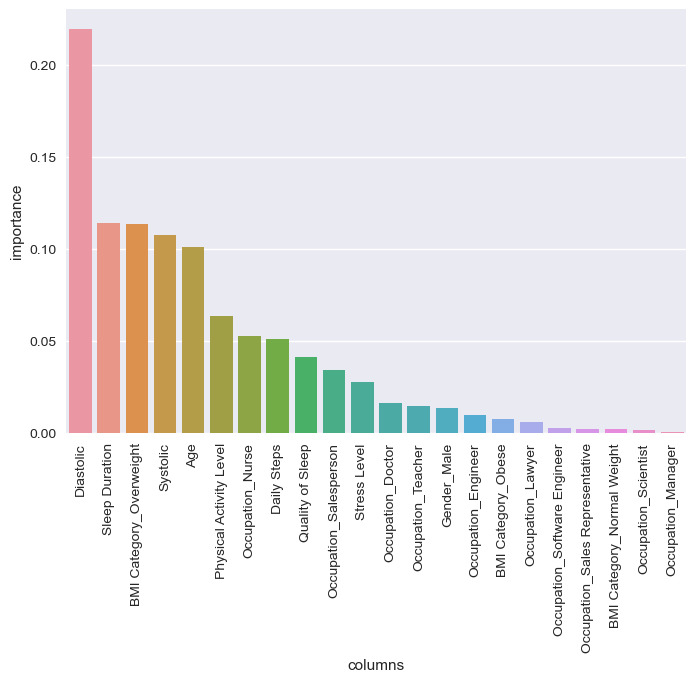

In [56]:
sns.barplot(x=rfc_feature_importance_df['columns'], y=rfc_feature_importance_df['importance'])
plt.xticks(rotation=90)
plt.show()

# Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [59]:
gb_model = GradientBoostingClassifier()

In [60]:
grid_gb_model = GridSearchCV(gb_model,param_grid)

In [61]:
grid_gb_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [62]:
grid_gb_model.best_params_

{'max_depth': 3, 'n_estimators': 20}

In [63]:
predictions = grid_gb_model.predict(X_test)

In [64]:
predictions

array(['None', 'None', 'None', 'None', 'Insomnia', 'None', 'None', 'None',
       'None', 'Sleep Apnea', 'Sleep Apnea', 'None', 'Sleep Apnea',
       'Sleep Apnea', 'Insomnia', 'Sleep Apnea', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'Insomnia', 'None', 'None',
       'Insomnia', 'Sleep Apnea', 'None', 'None', 'Insomnia',
       'Sleep Apnea', 'None', 'Insomnia', 'None', 'Insomnia',
       'Sleep Apnea', 'None', 'None', 'Sleep Apnea', 'Sleep Apnea',
       'None', 'None', 'Sleep Apnea', 'Insomnia', 'Sleep Apnea',
       'Insomnia', 'None', 'None', 'Sleep Apnea', 'Sleep Apnea',
       'Sleep Apnea', 'None', 'None', 'None', 'None', 'Sleep Apnea',
       'Insomnia', 'None', 'None', 'None', 'None', 'Sleep Apnea',
       'Sleep Apnea', 'None', 'None', 'None', 'None', 'None', 'Insomnia',
       'Sleep Apnea', 'None', 'None', 'Insomnia', 'None', 'None',
       'Sleep Apnea', 'Insomnia', 'Sleep Apnea', 'None', 'Sleep Apnea',
       'None', 'None', 'None', 'None', '

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Insomnia       0.88      0.82      0.85        17
        None       0.91      0.94      0.93        54
 Sleep Apnea       0.86      0.83      0.84        23

    accuracy                           0.89        94
   macro avg       0.88      0.86      0.87        94
weighted avg       0.89      0.89      0.89        94



In [66]:
grid_gb_model.best_estimator_.feature_importances_

array([1.48514856e-02, 1.45235579e-01, 1.33692074e-02, 5.64998545e-02,
       3.14262628e-04, 7.25670398e-02, 1.28105717e-01, 2.66446910e-01,
       2.20572832e-04, 0.00000000e+00, 8.17787585e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.22998510e-04, 0.00000000e+00,
       0.00000000e+00, 6.78509706e-03, 9.73803527e-04, 3.00223215e-05,
       6.31802649e-04, 2.93163868e-01])

In [67]:
gb_feature_importance_df = pd.DataFrame({'columns':X_train.columns.values, 
                                         'importance': grid_gb_model.best_estimator_.feature_importances_})
gb_feature_importance_df = gb_feature_importance_df.sort_values('importance', ascending=False)
gb_feature_importance_df = gb_feature_importance_df.reset_index(drop=True)
gb_feature_importance_df

,columns,importance
0,BMI Category_Overweight,0.293164
1,Diastolic,0.266447
2,Sleep Duration,0.145236
3,Systolic,0.128106
4,Daily Steps,0.072567
5,Physical Activity Level,0.056500
6,Age,0.014851
7,Quality of Sleep,0.013369
8,Occupation_Software Engineer,0.006785
9,Occupation_Teacher,0.000974


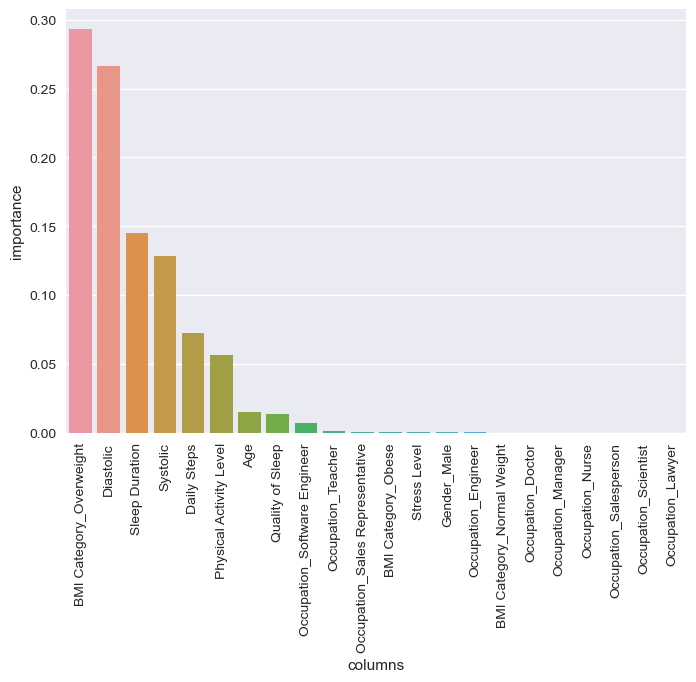

In [68]:
sns.barplot(x=gb_feature_importance_df['columns'], y=gb_feature_importance_df['importance'])
plt.xticks(rotation=90)
plt.show()

In [69]:
gb_accuracy_score = accuracy_score(y_test,predictions)
gb_precision_score = precision_score(y_test,predictions, average='macro')
gb_f1_score = f1_score(y_test,predictions, average='macro')

In [70]:
model_results = model_results.append({'Model': 'Gradient Boosting Classification', 'Accuracy':gb_accuracy_score,
                                      'Precision':gb_precision_score,
                                      'f1_score': gb_f1_score}, ignore_index=True)

<ipython-input-70-a9edd72d3011>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'Model': 'Gradient Boosting Classification', 'Accuracy':gb_accuracy_score,


# Overall Results

In [71]:
model_results

,Model,Accuracy,Precision,f1_score
0,Logistic Regression,0.893617,0.890873,0.872349
1,Random Forest Classification,0.893617,0.883117,0.873401
2,Gradient Boosting Classification,0.893617,0.883117,0.873401
